In [88]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
import scipy
from scipy.signal import peak_widths

genkt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec_qq_genkt.root")

Text(0.0, 1.0, 'FCC-ee simulation')

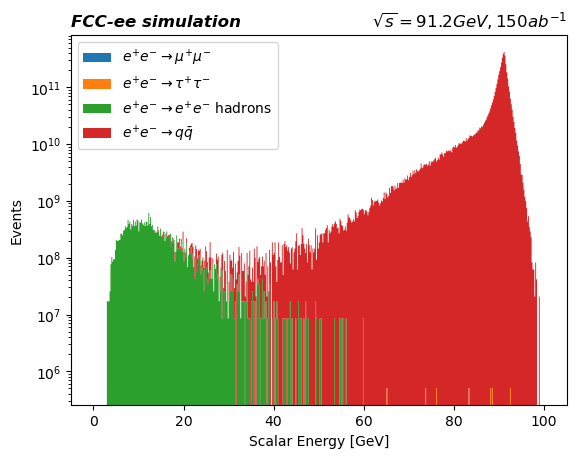

In [89]:
e = genkt['wzp6_ee_qq_ecm91p2/sum_e;1'].to_hist()
mu_e = genkt['wzp6_ee_mumu_ecm91p2/sum_e;1'].to_hist()
tau_e = genkt['wzp6_ee_tautau_ecm91p2/sum_e;1'].to_hist()
gaga_e = genkt['wzp6_gaga_qq_5_ecm91p2/sum_e;1'].to_hist()

hep.histplot([mu_e,tau_e, gaga_e,e], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill")
plt.yscale("log")
#plt.xlim(58,100)
plt.xlabel("Scalar Energy [GeV]")
plt.legend(loc = "upper left")
#plt.text(62,4000000000, "Filters: # of Jets > 2")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/sum_e_filter.png")

In [90]:
# e = genkt['wzp6_ee_qq_ecm91p2/sum_energy;1'].to_hist()
# mu_e = genkt['wzp6_ee_mumu_ecm91p2/sum_energy;1'].to_hist()
# tau_e = genkt['wzp6_ee_tautau_ecm91p2/sum_energy;1'].to_hist()
# gaga_e = genkt['wzp6_gaga_qq_5_ecm91p2/sum_energy;1'].to_hist()

# hep.histplot([mu_e,tau_e, gaga_e,e], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
#                       r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons",
#                                                r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
#              stack = True, histtype = "fill")
# plt.yscale("log")
# #plt.xlim(58,100)
# plt.xlabel("Scalar Energy [GeV]")
# plt.legend(loc = "upper left")
# #plt.text(62,4000000000, "Filters: # of Jets > 2")
# plt.ylabel("Events")
# plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
# plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
# #plt.savefig("images/hadron_xsec/sum_e_filter.png")

Text(0.0, 1.0, 'FCC-ee simulation')

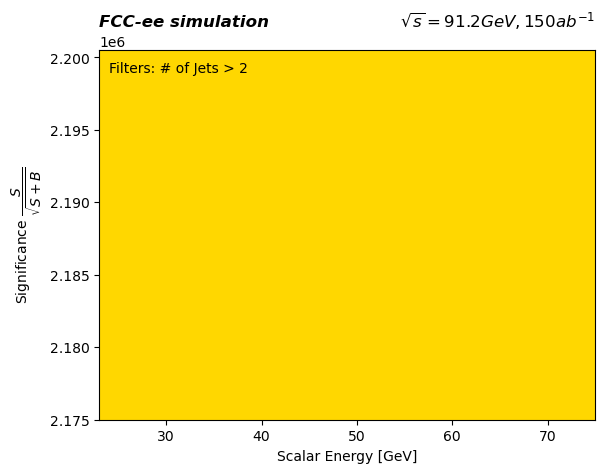

In [91]:
e_y, e_x = e.to_numpy()
e_ynew = []

for i in e_x:
    s = e[i*1.0j:].sum()
    b = tau_e[i*1.0j:].sum()+mu_e[i*1.0j:].sum()+gaga_e[i*1.0j:].sum()
    if s.value+b.value < 0.00000000000000000000000000000000000000000000000000000001:
        e_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        e_ynew.append(ratio)

plt.stackplot(e_x,e_ynew, color = "gold")
plt.ylim(2.175e6,2.2005e6)
plt.text(24,2.199e6, "Filters: # of Jets > 2")
plt.xlim(23,75)
plt.xlabel("Scalar Energy [GeV]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/cut_sum_e_filter.png")

In [92]:
optmize = max(e_ynew)
index = np.argmax(e_ynew)
cut = e_x[index]

print(optmize)
print(cut)

2268172.2251988933
28.4


In [93]:
cuts = genkt['wzp6_ee_qq_ecm91p2/cutFlow;1'].to_hist()
gaga_cuts = genkt['wzp6_gaga_qq_5_ecm91p2/cutFlow;1'].to_hist()
tau_cuts = genkt['wzp6_ee_tautau_ecm91p2/cutFlow;1'].to_hist()
mu_cuts = genkt['wzp6_ee_mumu_ecm91p2/cutFlow;1'].to_hist()

events0,cuts_x = cuts.to_numpy()
gaga_events0,gaga_cuts_x = gaga_cuts.to_numpy()
tau_events0,tau_cuts_x = tau_cuts.to_numpy()
mu_events0,mu_cuts_x = mu_cuts.to_numpy()

print(events0[2])
print(gaga_events0[2])
print(tau_events0[2])
print(mu_events0[2])

5148048600000.0
27895501440.0
3570000.0
0.0


In [106]:
events = e[cut*1j:].sum().value
gaga_events = gaga_e[cut*1j:].sum().value
tau_events = tau_e[cut*1j:].sum().value
mu_events = mu_e[cut*1j:].sum().value
sig = events/np.sqrt(events+tau_events+gaga_events)

print(events)
print(gaga_events)
print(tau_events)
print(mu_events)
print(sig)

5104640700000.0
0.0
3570000.0
0.0
2259344.4026979366


Text(0.0, 1.0, 'FCC-ee simulation')

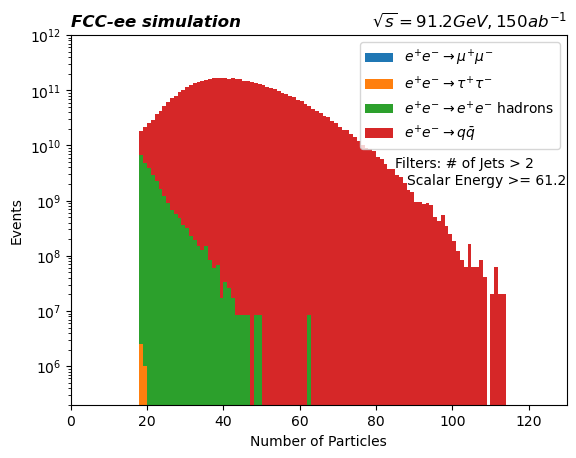

In [95]:
no = genkt['wzp6_ee_qq_ecm91p2/RP_no;1'].to_hist()
mu_no = genkt['wzp6_ee_mumu_ecm91p2/RP_no;1'].to_hist()
tau_no = genkt['wzp6_ee_tautau_ecm91p2/RP_no;1'].to_hist()
gaga_no = genkt['wzp6_gaga_qq_5_ecm91p2/RP_no;1'].to_hist()

hep.histplot([mu_no,tau_no, gaga_no,no], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill")
plt.yscale("log")
plt.xlim(0,130)
plt.ylim(2e5,1e12)
plt.xlabel("Number of Particles")
plt.legend(loc = "upper right")
plt.text(85,4000000000, "Filters: # of Jets > 2")
plt.text(88,2000000000, "Scalar Energy >= 61.2")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/no_filtersum_e.png")

Text(0.0, 1.0, 'FCC-ee simulation')

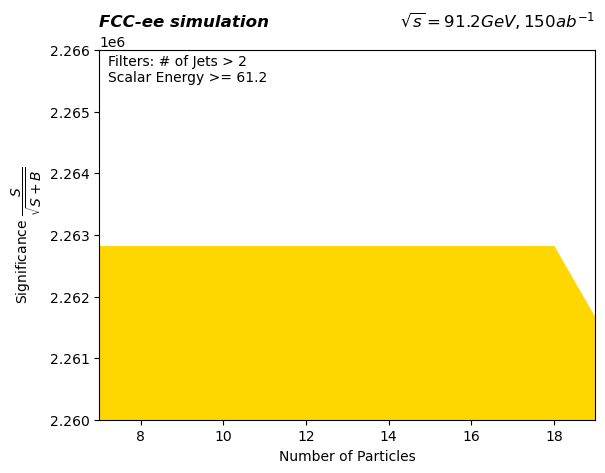

In [96]:
no_y , no_x = no.to_numpy()


no_ynew = []

for i in no_x:
    s = no[i*1.0j:].sum()
    b = tau_no[i*1.0j:].sum()+mu_no[i*1.0j:].sum()+gaga_no[i*1.0j:].sum()
    if s.value+b.value < 0.0000000001:
        no_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        no_ynew.append(ratio)

plt.stackplot(no_x,no_ynew, color = "gold")
plt.ylim(2.26e6,2.266e6)
plt.xlim(7,19)
plt.text(7.2,2.26575e6, "Filters: # of Jets > 2")
plt.text(7.2,2.2655e6, "Scalar Energy >= 61.2")
plt.xlabel("Number of Particles")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/cut_RP_no_filtersum_e.png")

In [97]:
optmize = max(no_ynew)
index = np.argmax(no_ynew)
cut = no_x[index]

print(optmize)
print(cut)

2262807.9698465085
0.0


In [98]:
events = no[cut*1.0j:].sum().value
gaga_events = gaga_no[cut*1.0j:].sum().value
tau_events = tau_no[cut*1.0j:].sum().value
mu_events = mu_no[cut*1.0j:].sum().value

print(events)
print(gaga_events)
print(tau_events)
print(mu_events)

5148048600000.0
27895501440.0
3570000.0
0.0


(0.0, 100.0)

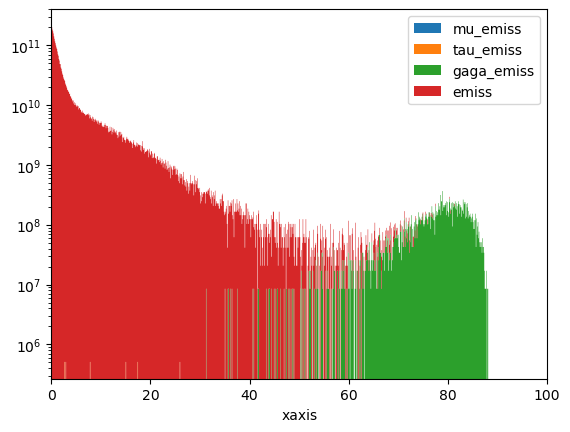

In [99]:
emiss = genkt['wzp6_ee_qq_ecm91p2/missingEnergy;1'].to_hist()
mu_emiss = genkt['wzp6_ee_mumu_ecm91p2/missingEnergy;1'].to_hist()
tau_emiss = genkt['wzp6_ee_tautau_ecm91p2/missingEnergy;1'].to_hist()
gaga_emiss = genkt['wzp6_gaga_qq_5_ecm91p2/missingEnergy;1'].to_hist()

hep.histplot([mu_emiss,tau_emiss,gaga_emiss,emiss], label = ["mu_emiss","tau_emiss","gaga_emiss","emiss"], histtype = "fill", stack = True)
plt.yscale("log")
plt.legend()
plt.xlim(0,100)

Text(0.0, 1.0, 'FCC-ee simulation')

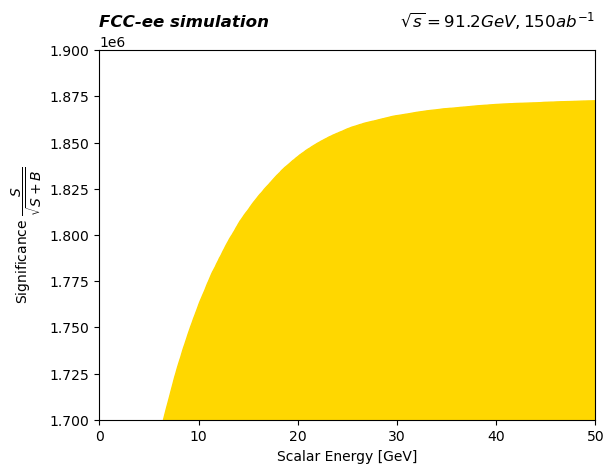

In [100]:
em_y, em_x = emiss.to_numpy()
em_ynew = []

for i in range(1,len(em_x)+1):
    s = emiss[:i].sum()
    b = tau_emiss[:i].sum()+mu_emiss[:i].sum()+gaga_emiss[:i].sum()
    if s.value+b.value < 0.00000000000000000000000000000000000000000000000000000001:
        em_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        em_ynew.append(ratio)

plt.stackplot(em_x,em_ynew, color = "gold")
plt.ylim(1.7e6,1.9e6)
#plt.text(24,2.199e6, "Filters: # of Jets > 2")
plt.xlim(0,50)
plt.xlabel("Scalar Energy [GeV]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/cut_sum_e_filter.png")

In [101]:
optmize = max(em_ynew)
index = np.argmax(em_ynew)
cut = em_x[index]

print(optmize)
print(cut)

1873319.6842052152
62.6


In [102]:
events = emiss[:cut*1.0j].sum().value
gaga_events = gaga_emiss[:cut*1.0j].sum().value
tau_events = tau_emiss[:cut*1.0j].sum().value
mu_events = mu_emiss[:cut*1.0j].sum().value

print(events)
print(gaga_events)
print(tau_events)
print(mu_events)

3510720000000.0
1423761840.0
3060000.0
0.0


Text(0.0, 1.0, 'FCC-ee simulation')

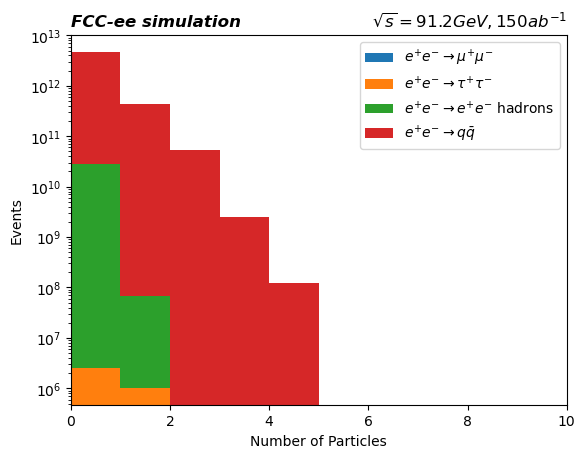

In [103]:
el = genkt['wzp6_ee_qq_ecm91p2/electrons;1'].to_hist()
mu_el = genkt['wzp6_ee_mumu_ecm91p2/electrons;1'].to_hist()
tau_el = genkt['wzp6_ee_tautau_ecm91p2/electrons;1'].to_hist()
gaga_el = genkt['wzp6_gaga_qq_5_ecm91p2/electrons;1'].to_hist()

hep.histplot([mu_el,tau_el, gaga_el,el], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill")
plt.yscale("log")
plt.xlim(0,10)
plt.xlabel("Number of Particles")
plt.legend()
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/no_filtersum_e.png")

Text(0.0, 1.0, 'FCC-ee simulation')

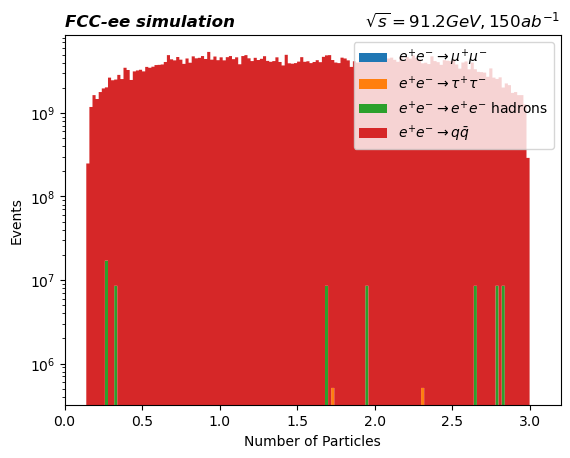

In [104]:
el = genkt['wzp6_ee_qq_ecm91p2/electrons_theta;1'].to_hist()
mu_el = genkt['wzp6_ee_mumu_ecm91p2/electrons_theta;1'].to_hist()
tau_el = genkt['wzp6_ee_tautau_ecm91p2/electrons_theta;1'].to_hist()
gaga_el = genkt['wzp6_gaga_qq_5_ecm91p2/electrons_theta;1'].to_hist()

hep.histplot([mu_el,tau_el, gaga_el,el], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",
                      r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill")
plt.yscale("log")
plt.xlim(0,3.2)
plt.xlabel("Number of Particles")
plt.legend()
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/no_filtersum_e.png")

In [105]:
print(el)

                          ┌──────────────────────────────────────────────────┐
[ -inf,    -5) 0          │                                                  │
[   -5, -4.98) 0          │                                                  │
[-4.98, -4.96) 0          │                                                  │
[-4.96, -4.94) 0          │                                                  │
[-4.94, -4.92) 0          │                                                  │
[-4.92,  -4.9) 0          │                                                  │
[ -4.9, -4.88) 0          │                                                  │
[-4.88, -4.86) 0          │                                                  │
[-4.86, -4.84) 0          │                                                  │
[-4.84, -4.82) 0          │                                                  │
[-4.82,  -4.8) 0          │                                                  │
[ -4.8, -4.78) 0          │                         